In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
data = pd.read_csv('anime.csv')
data.head()

,Title,Score,Vote,Ranked,Popularity,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating
0,Sousou no FrierenFrieren: Beyond Journey's End,9.14,128768,1,508,28,Currently Airing,"Sep 29, 2023 to Mar 2024",Fall 2023,"['Aniplex', 'Dentsu', 'Shogakukan-Shueisha Pro...","None found, add some",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older
1,Fullmetal Alchemist: Brotherhood,9.09,2080863,2,3,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","Funimation, Aniplex of America",Bones,Manga,24 min. per ep.,R - 17+ (violence & profanity)
2,Steins;Gate,9.07,1375512,3,13,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,"['Frontier Works', 'Media Factory', 'Kadokawa ...",Funimation,White Fox,Visual novel,24 min. per ep.,PG-13 - Teens 13 or older
3,Gintama°Gintama Season 4,9.06,246431,4,337,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,"['TV Tokyo', 'Aniplex', 'Dentsu']","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,24 min. per ep.,PG-13 - Teens 13 or older
4,Shingeki no Kyojin Season 3 Part 2Attack on Ti...,9.05,1545108,5,21,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",Funimation,Wit Studio,Manga,23 min. per ep.,R - 17+ (violence & profanity)


In [3]:
data.shape

(10000, 15)

In [4]:
data.describe()

,Score,Vote,Ranked,Popularity
count,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,7.422213,8.541276e+04,2501.742900,3920.264900
std,0.447107,2.001964e+05,1444.259909,3090.780317
min,6.800000,1.090000e+02,1.000000,1.000000
25%,7.080000,4.684750e+03,1250.750000,1419.750000
50%,7.330000,1.943250e+04,2503.000000,3193.000000
75%,7.670000,7.341925e+04,3752.250000,5724.250000
max,9.140000,2.745016e+06,5026.000000,16554.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       10000 non-null  object 
 1   Score       10000 non-null  float64
 2   Vote        10000 non-null  int64  
 3   Ranked      10000 non-null  int64  
 4   Popularity  10000 non-null  int64  
 5   Episodes    10000 non-null  object 
 6   Status      10000 non-null  object 
 7   Aired       10000 non-null  object 
 8   Premiered   4878 non-null   object 
 9   Producers   10000 non-null  object 
 10  Licensors   10000 non-null  object 
 11  Studios     10000 non-null  object 
 12  Source      10000 non-null  object 
 13  Duration    10000 non-null  object 
 14  Rating      9980 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 1.1+ MB


In [6]:
s =data.isna()
s.sum()  
# Premiered and Rating column is having null values 

Title            0
Score            0
Vote             0
Ranked           0
Popularity       0
Episodes         0
Status           0
Aired            0
Premiered     5122
Producers        0
Licensors        0
Studios          0
Source           0
Duration         0
Rating          20
dtype: int64

In [7]:
data['Premiered']  # (5122/10000 )*100 , 51.22% data missing 

0         Fall 2023
1       Spring 2009
2       Spring 2011
3       Spring 2015
4       Spring 2019
           ...     
9995            NaN
9996      Fall 2015
9997            NaN
9998            NaN
9999            NaN
Name: Premiered, Length: 10000, dtype: object

In [8]:
data['Rating'] # (20/10000)*100 , 0.2% data missing

0            PG-13 - Teens 13 or older
1       R - 17+ (violence & profanity)
2            PG-13 - Teens 13 or older
3            PG-13 - Teens 13 or older
4       R - 17+ (violence & profanity)
                     ...              
9995         PG-13 - Teens 13 or older
9996    R - 17+ (violence & profanity)
9997    R - 17+ (violence & profanity)
9998    R - 17+ (violence & profanity)
9999         PG-13 - Teens 13 or older
Name: Rating, Length: 10000, dtype: object

In [17]:
# Droping Premiered column as more than 50% of the data is missing 
data.drop(['Premiered'], axis =1)

,Title,Score,Vote,Ranked,Popularity,Episodes,Status,Aired,Producers,Licensors,Studios,Source,Duration,Rating
0,Sousou no FrierenFrieren: Beyond Journey's End,9.14,128768,1,508,28,Currently Airing,"Sep 29, 2023 to Mar 2024","['Aniplex', 'Dentsu', 'Shogakukan-Shueisha Pro...","None found, add some",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older
1,Fullmetal Alchemist: Brotherhood,9.09,2080863,2,3,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010","['Aniplex', 'Square Enix', 'Mainichi Broadcast...","Funimation, Aniplex of America",Bones,Manga,24 min. per ep.,R - 17+ (violence & profanity)
2,Steins;Gate,9.07,1375512,3,13,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011","['Frontier Works', 'Media Factory', 'Kadokawa ...",Funimation,White Fox,Visual novel,24 min. per ep.,PG-13 - Teens 13 or older
3,Gintama°Gintama Season 4,9.06,246431,4,337,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016","['TV Tokyo', 'Aniplex', 'Dentsu']","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,24 min. per ep.,PG-13 - Teens 13 or older
4,Shingeki no Kyojin Season 3 Part 2Attack on Ti...,9.05,1545108,5,21,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019","['Production I.G', 'Dentsu', 'Mainichi Broadca...",Funimation,Wit Studio,Manga,23 min. per ep.,R - 17+ (violence & profanity)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Sword Art Online: Alicization - Recollection,6.81,20342,5000,3259,1,Finished Airing,"Feb 17, 2019",['Egg Firm'],Aniplex of America,A-1 Pictures,Light novel,24 min.,PG-13 - Teens 13 or older
9996,Taimadou Gakuen 35 Shiken ShoutaiAnti-Magic Ac...,6.81,146677,5001,752,12,Finished Airing,"Oct 8, 2015 to Dec 24, 2015","['KlockWorx', 'MAGES.', 'Glovision', 'Kadokawa...",Discotek Media,SILVER LINK.,Light novel,23 min. per ep.,R - 17+ (violence & profanity)
9997,Taiyou no Mokushiroku: A Spirit of the Sun,6.81,900,5002,9592,2,Finished Airing,"Sep 17, 2006 to Sep 18, 2006",['Tohokushinsha Film Corporation'],Maiden Japan,Madhouse,Manga,1 hr. 17 min. per ep.,R - 17+ (violence & profanity)
9998,Weiß Kreuz OVAKnight Hunters OVA,6.81,2547,5003,7874,2,Finished Airing,"Nov 25, 1999 to Feb 23, 2000",['Marine Entertainment'],"None found, add some","Triangle Staff, animate Film",Unknown,30 min. per ep.,R - 17+ (violence & profanity)


In [10]:
duplicated_rows = data.duplicated().sum()
duplicated_rows

1631

In [11]:
remove = data.drop_duplicates()

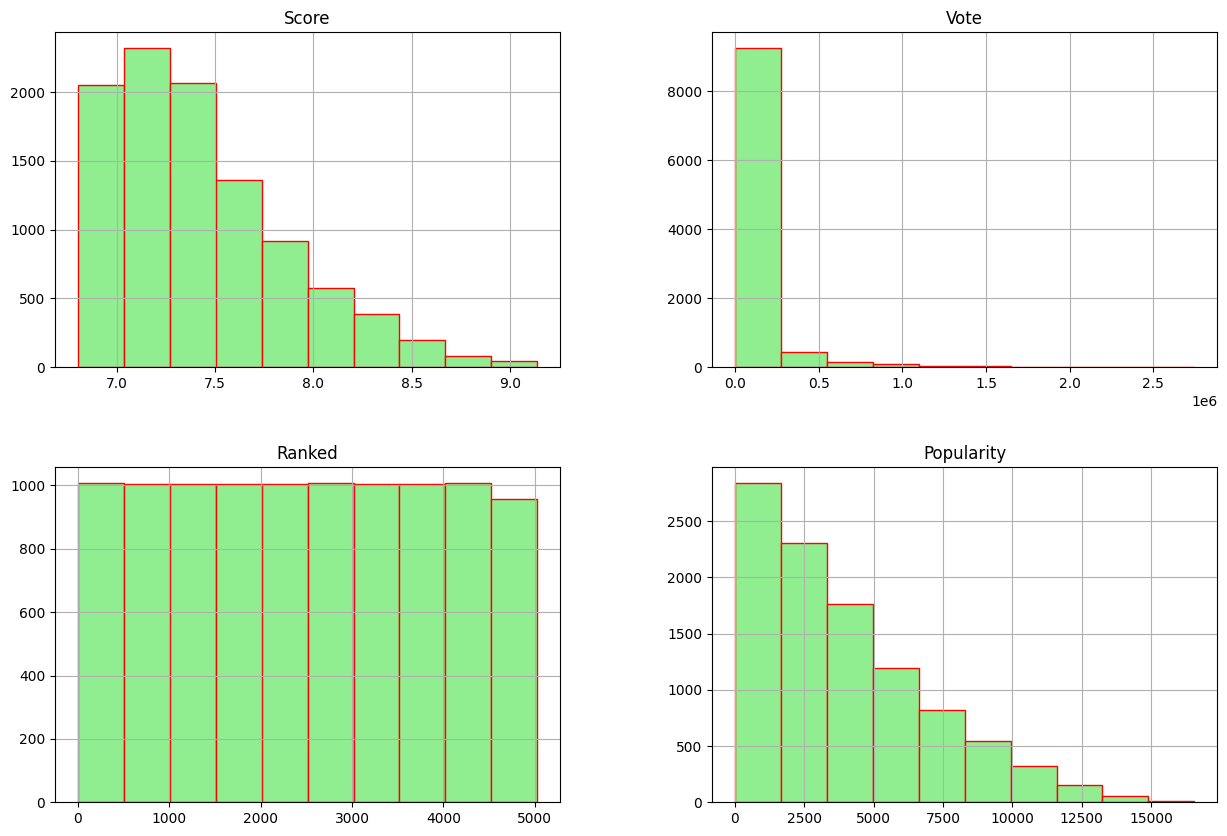

In [16]:
#Distribution of mumerical columns 
data.hist(bins=10, color='lightgreen', ec='red', figsize=(15, 10))
plt.show()

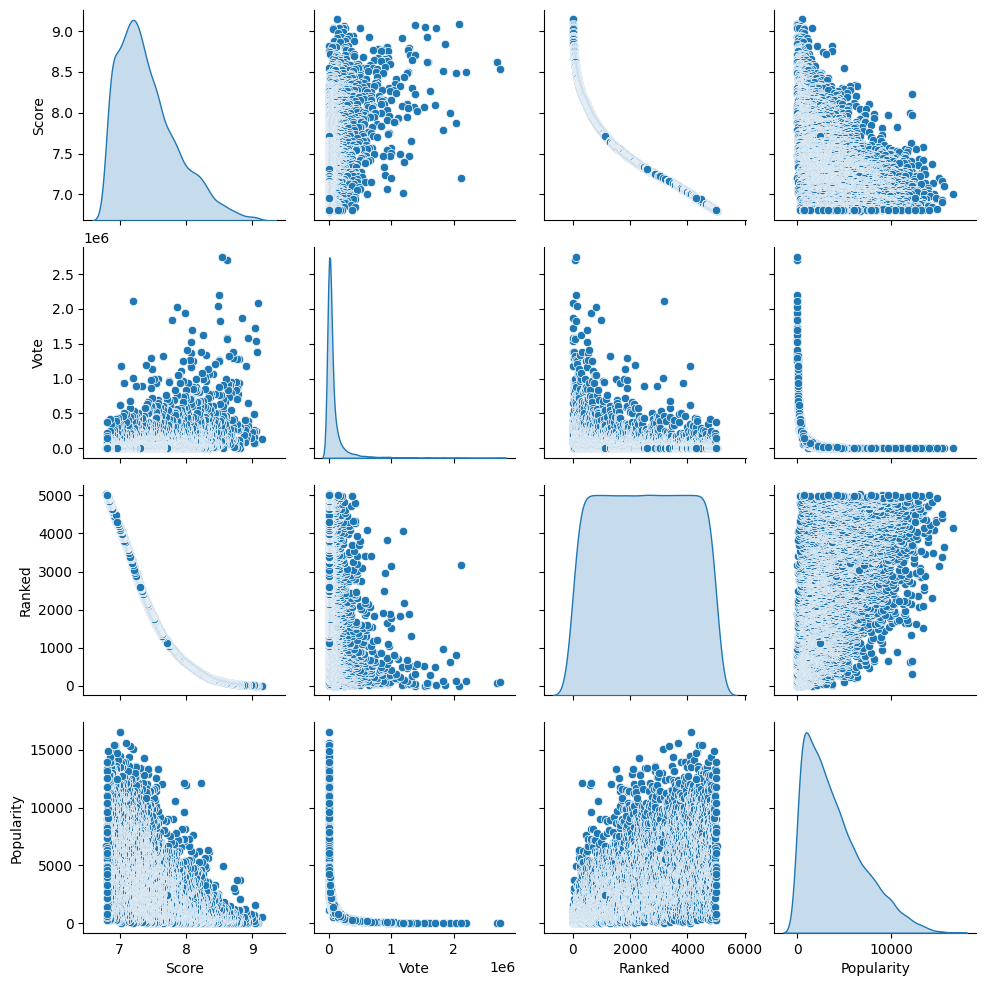

In [18]:
#Relationship between numerical columns
sns.pairplot(data[['Score','Vote','Ranked', 'Popularity']] , diag_kind='kde')
plt.show()

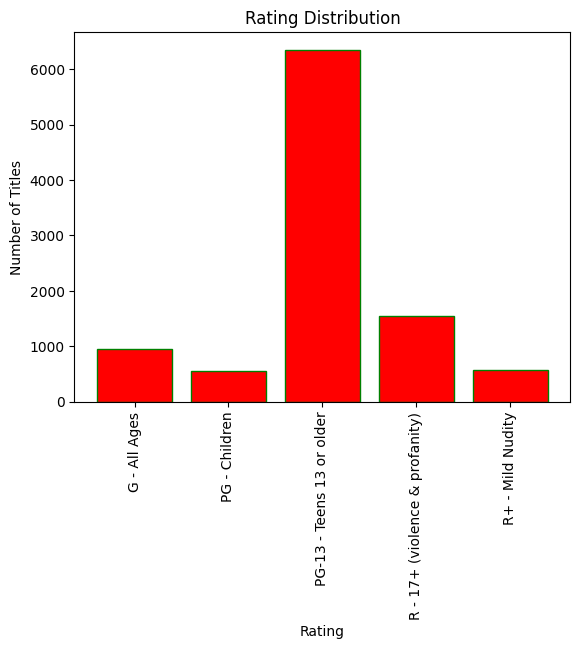

In [26]:
data['Rating'].replace('Unknown', pd.NA, inplace=True)
ratings_counts = data['Rating'].value_counts().sort_index()
plt.bar(ratings_counts.index, ratings_counts.values, color='red', edgecolor='green')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.show()

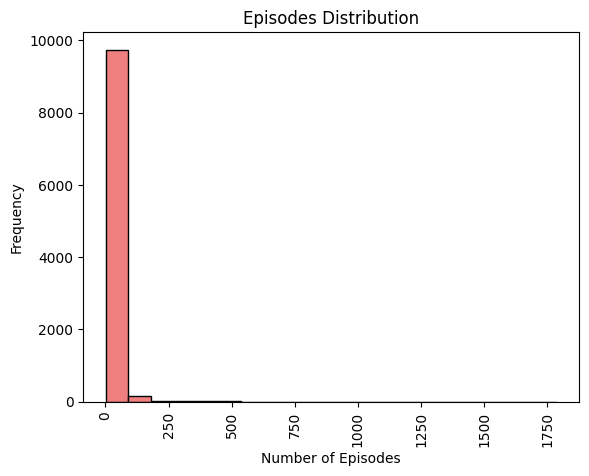

In [33]:
data['Episodes'].replace('Unknown', pd.NA, inplace=True)
data['Episodes'] = pd.to_numeric(data['Episodes'], errors='coerce')

plt.hist(data['Episodes'].dropna(), bins=20, color='lightcoral', edgecolor='black')
plt.title('Episodes Distribution')
plt.xlabel('Number of Episodes')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

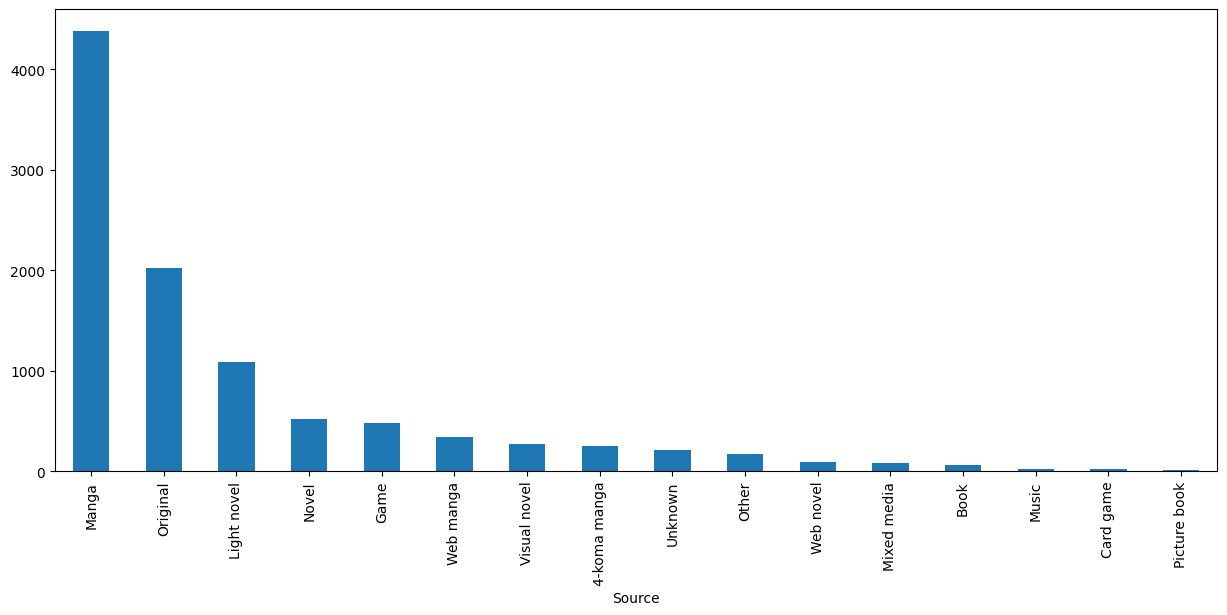

In [34]:
data['Source'].value_counts().plot(kind='bar', figsize=(15, 6))
plt.show()

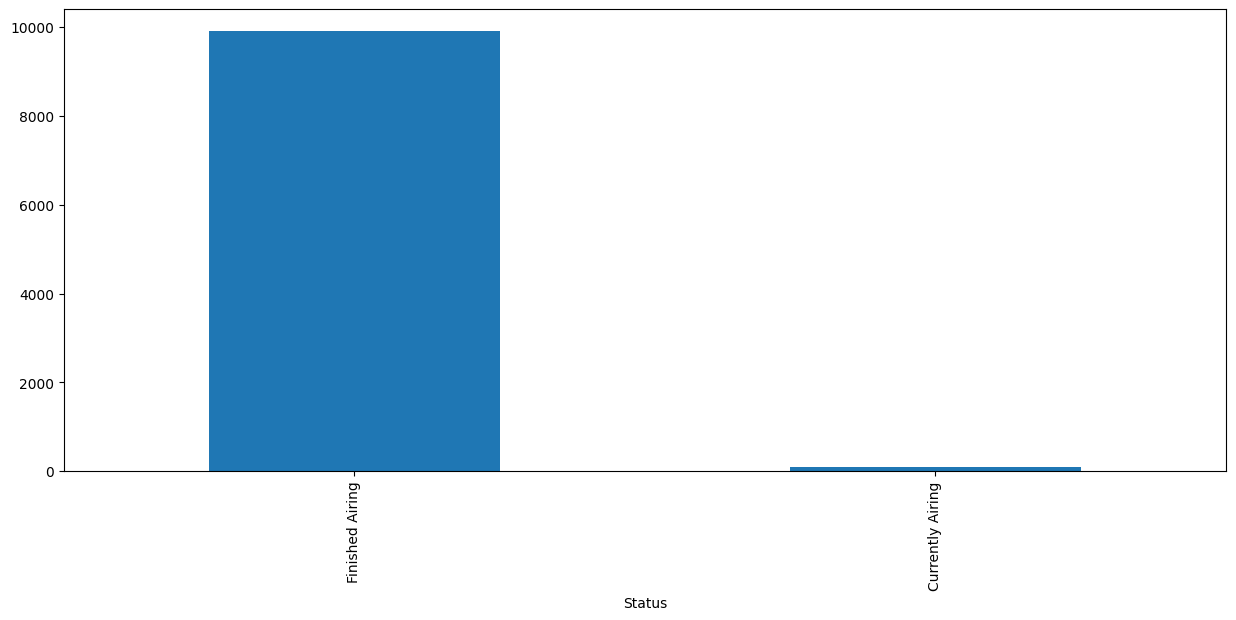

In [35]:
data['Status'].value_counts().plot(kind='bar', figsize=(15, 6))
plt.show()

In [39]:
# Production Details 
producer_count = pd.Series(data['Producers'].str.split(',').explode()).value_counts().head(10) #Displaying top 10 producers 
licensor_count = pd.Series(data['Licensors'].str.split(',').explode()).value_counts().head(10)
studio_count = pd.Series(data['Studios'].str.split(',').explode()).value_counts().head(10)

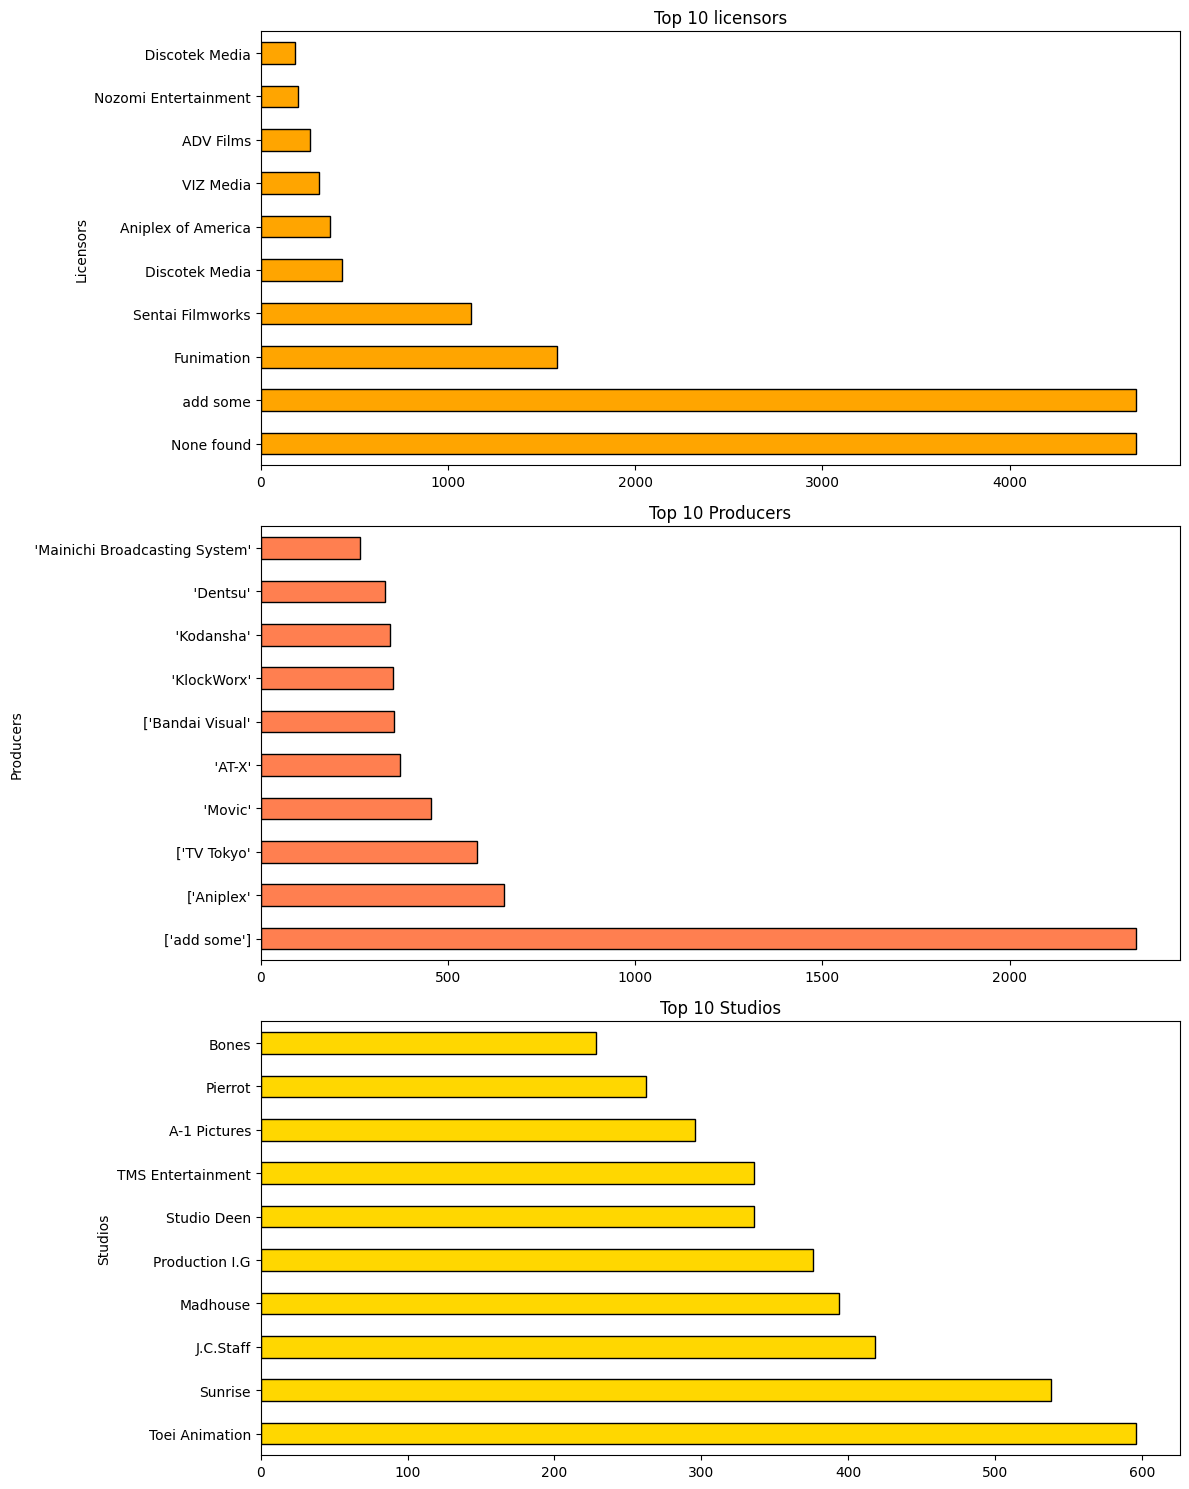

In [50]:
#Graph displaying production details 
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
licensor_count.plot(kind='barh', color='orange', edgecolor='black', ax=axes[0])
axes[0].set_title('Top 10 licensors')
producer_count.plot(kind='barh', color='coral', edgecolor='black', ax=axes[1])
axes[1].set_title('Top 10 Producers') # Imp axis (ax) number need to be changed
studio_count.plot(kind='barh', color='gold', edgecolor='black', ax=axes[2])
axes[2].set_title('Top 10 Studios')
plt.tight_layout()
plt.show()



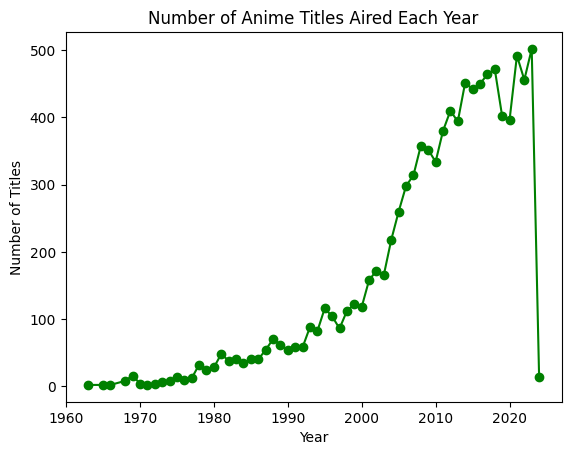

In [68]:
# Extracting start date from the aired date 
data['Aired_Start_Year'] = pd.to_datetime(data['Aired'].str.split(' to ').str[0], errors='coerce').dt.year
# Drop rows with missing or invalid start year
data = data.dropna(subset=['Aired_Start_Year'])
# Plotting the analysis
aired_year_counts = data['Aired_Start_Year'].value_counts().sort_index()
plt.plot(aired_year_counts.index, aired_year_counts.values, marker='o', color='green')
plt.title('Number of Anime Titles Aired Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


<BarContainer object of 60 artists>

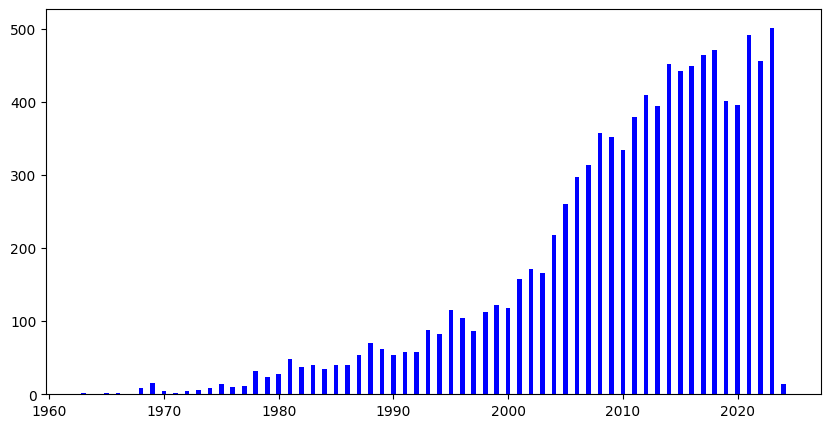

In [70]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(aired_year_counts.index, aired_year_counts.values, color ='blue', 
        width = 0.4)